## Ансамблирование. Бэггинг, стекинг, бустинг

3 основных способа построения ансамблей:
* **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей. 
* **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

Метод | ✔️ Плюсы | ⛔ Минусы
--|--|--
Бэггинг | Хорошо параллелится вычисление (модели обучаются параллельно) <br> Снижает дисперсию | Предполагается использование одинаковых моделей <br> Необходимо использование глубоких деревьев <br> Плохо интерпретируемая
Стекинг | Хорошо параллелится (модели обучаются параллельно) <br> Хорош для использования различных по природе базовых моделей | Качество сильно зависит от качества базовых моделей <br> Плохо интерпретируемая
Бустинг | Модели обучаются последовательно, уточняя друг друга <br> Снижает смещение <br> Базовые модели — неглубокие деревья | Плохо параллелится вычисление <br> Плохо интерпретируемая

In [62]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

**Загрузка данных**

In [63]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


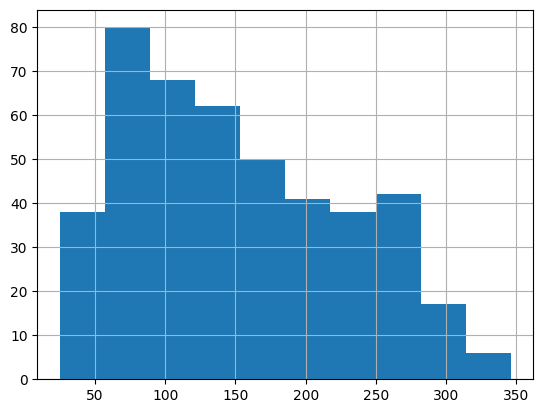

In [3]:
# Посмотрим на распределение целевого признака
y.hist();

In [64]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)


## Бэггинг: случайный лес. 

Пример бэггинга - случайный лес, он является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: случайная выборка для обучения и случайное множество признаков. 

После обучения отдельные решающие деревья объединяются в ансамбль. Для задачи классификации ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи регрессии ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Идея ансамблирования основана на уменьшении разброса предсказаний модели. Доказано, что дисперсия ансамбля типа бэггинг (variance) в n раз меньше, чем смещение отдельной базовой модели.

Проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

In [65]:
# Создаем модель дерева решений с максимальной глубиной 10 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
# Обучаем модель
regr1.fit(X_train, y_train);

In [66]:
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
# Обучаем модель
regr2.fit(X_train, y_train);

In [67]:
# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса  3533.73


In [68]:
regr1 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr1.fit(X_train, y_train)
regr2 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса  3549.09


 ## Стекинг

**Стекинг (stacking)** — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы

**Блендинг** - простейшая реализация стекинга. Предположим у нас есть обучающая выборка, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – метапризнаки, на которых уже и обучается в дальнейшем метамодель. Недостатки блендинга - ни базовые модели, ни метамодель не обучаются на полных данных. 

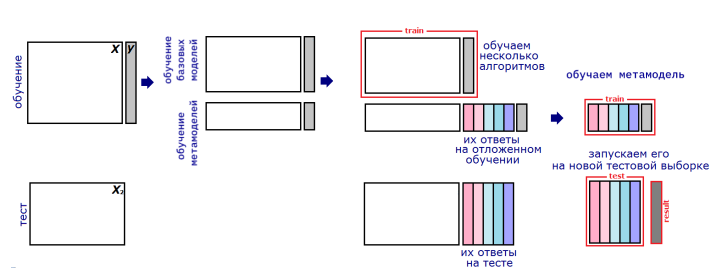

Классический стекинг использует кросс-валидацию. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных:
* В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
* В качестве базовых моделей лучшего всего использовать модели различной природы.

Стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — m, количество наблюдений — n, количество моделей в стекинге — K.

Алгоритм:
1. Обучающая выборка разбивается на L равных частей, называемых фолдами. Например, для трёх фолдов (L=3):

    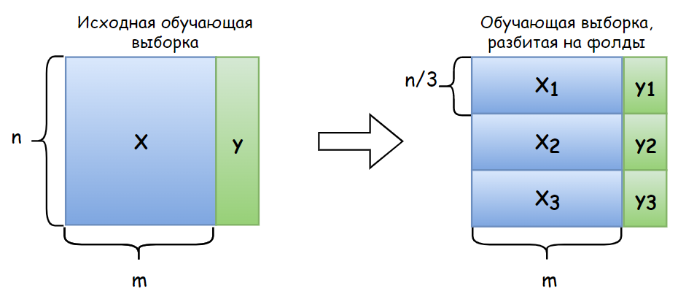

2. Для каждой базовой модели фолды перебираются следующим образом: на каждом шаге фиксируются L-1 фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано L предсказаний, из которых формируется метапризнак $M_j$, где j — номер модели. Т.о. избегаем переобучения.

    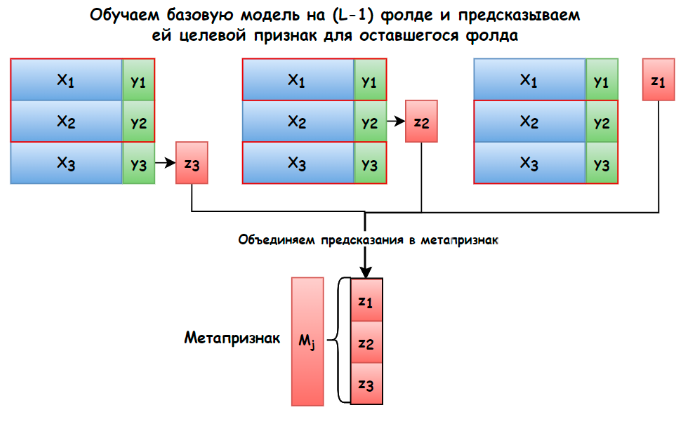

3. Получаем новый набор данных, состоящий из K метапризнаков — предсказаний каждой из моделей, на которых будет обучена метамодель.

    Пусть мы взяли три разных модели, т. е. K=3:

    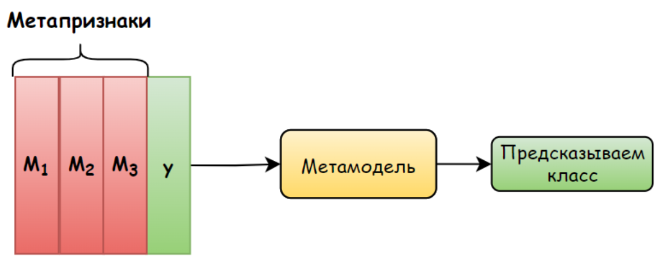

In [70]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

In [72]:
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=42)
)
# Обучаем модель
reg.fit(X_train, y_train);

In [73]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

Качество предсказания по MSE для стекинга 3373.67


In [11]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.478402,154.0
1,202.027156,192.0
2,133.716923,116.0
3,146.702419,81.0
4,169.782655,122.0


 ## Бустинг
 



**Бустинг (boosting)** — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые веса наблюдений. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

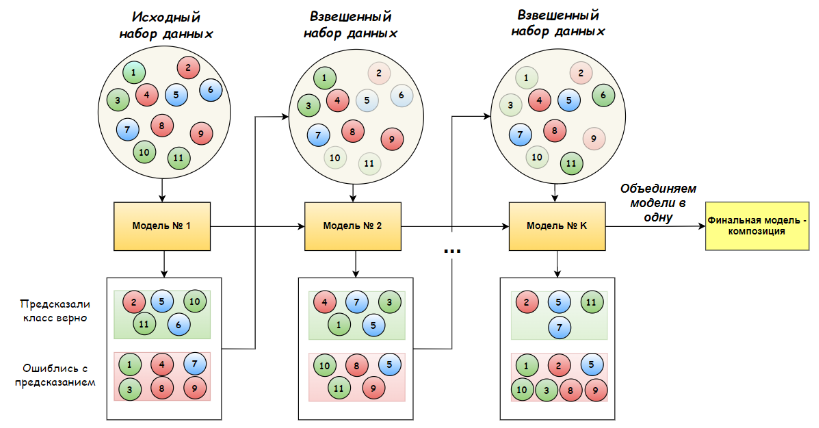

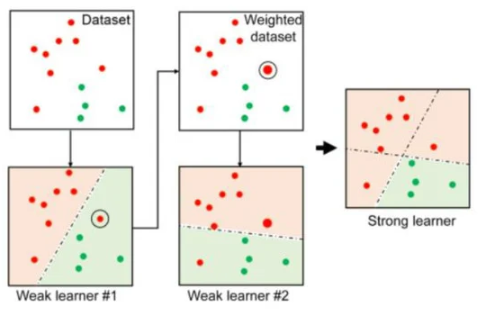

Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то цель бустинга — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают алгоритмы с высоким смещением и небольшим разбросом, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

### Адаптивный бустинг

 Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Пусть у нас есть набор данных X, в котором N объектов размерности m (вектора в признаковом пространстве размера M) и метки класса $y \isin -1,1$, где -1 и 1 — метки отрицательного и положительного класса соответственно.

Будем строить ансамбль из K абстрактных базовых моделей — классификаторов. Обозначим их как a(x) (это могут быть логистические регрессии/деревья решений или что-то ещё).  

1. Перед обучением базовой модели мы инициализируем веса объектов обучающей выборки следующим образом: 

    $w_j = \frac{1}{N}, j = 1, 2,..., N$

2. Для всех i от 1 до K:
    - Обучить базовую модель $a_i(x)$ с учётом весов объектов $w_j$.
    - Вычислить ошибку классификатора $a_i(x)$, обозначим её за $e_i$:

        $e_i = \sum{j=1}{N}w_j[y_j<>a_i(x_j)]$

        $[y_j<>a_i(x_j)]$ — индикаторная функция. Она равна 1, если ответ $y_j$ не совпал с предсказанием базовой модели $a_i(x_j)$, и 0 — в противном случае.

3. Вес предсказаний данного классификатора (мера «вклада» предсказаний i-ой модели в общий ансамбль) вычисляется по формуле: 

    $n_i = \frac{1}{2}ln(\cfrac{1-e_i}{e_i})$

    Формула веса становится нулевой только при случайном угадывании, то есть когда классификатор ошибается в половине меток — работает ровно так же, как и подбрасывание монетки. Однако остальные будут вносить вес в итоговую модель с положительным или отрицательным знаком (в этом легко убедиться, подставив вероятность ошибки, отличную от 0.5). Тем самым мы исключаем возможность вклада случайных классификаторов в результирующую модель.

4. Обновляем веса объектов в выборке. Для тех объектов, на которых мы допустили ошибку, вес увеличивается; для тех объектов, для которых наш ансамбль предсказал верный ответ — не изменяется. Формула обновления весов:

    $w_j = w_je^{-n_j[y_j<>a_i(x_j)]}, j=1,2,...,N$

    Видно, что если классификация была произведена верно для объекта $x_j$, то степень экспоненты будет равна 0, а значит множитель $n_j[y_j<>a_i(x_j)]$ и вес $w_j$ не изменится. 

    Для того, чтобы привести все веса объектов к единому масштабу от 0 до 1, производится их нормировка путем деления каждого веса  на сумму всех весов.

5. После обучения каждой базовой модели предсказания ансамбля строятся как сумма из предсказаний базовых моделей, взятых с весом $n_i$: $f(x) = sign(\sum{i-1}{N}n_ia_i(x))$.

    Функция sign — функция взятия знака, принимает значение -1, если аргумент функции отрицательный, 0 — если аргумент функции нулевой, и 1 — если аргумент функции положительный.

Плюсы | Минусы
--|--
✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций. | ⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.
✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей. | ⛔️ Склонен к переобучению при наличии шума в данных.
✔️ Показывает хорошую обобщающую способность. | ⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.
✔️ Имеет возможность идентификации шумовых объектов.

In [80]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    base_estimator=dt, #базовая модель
    n_estimators=10, #количество моделей в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')


Качество предсказания по MSE для AdaBoost 3040.83


### Градиентный бустинг

**Градиентный бустинг (Gradient Boosting, GB)** — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием.

Основное отличие градиентного бустинга от адаптивного заключается в том, что градиентный бустинг строит композицию из своих базовых моделей, подбирая их оптимальным образом на основе принципа градиентных методов оптимизации. Такая модификация позволяет значительно ускорить процесс последовательного построения ансамбля в сравнении с реализации AdaBoost и добиться лучшего качества за счет меньшего количества моделей в ансамбле. 

Градиентный бустинг использует информацию о функции потерь для построения нового алгоритма. 

Допустим, у нас есть некоторая функция потерь $L(y, \^y)$

Пусть мы построили какую-то модель $a_1(x)$  — это какая-то функция, которая принимает на вход объекты x и выдаёт для них предсказания. Качество такой модели, скорее всего, будет не очень хорошим, ведь мы обучаем слабые модели.

Однако мы знаем, на каких объектах модель давала точные предсказания, а на каких — ошибалась. Нужно попробовать использовать эту информацию и обучить ещё одну модель $a_2(x)$.

Допустим, мы знаем, что предсказание первой модели на каком-то объекте $x_i$ на 10 больше, чем в реальности ($a1(x_i) = y_i + 10$). Нужно обучить следующую модель $a_2(x)$ так, чтобы она предсказала для $x_i$ ответ -10, то есть $a_2(x_i) = -10$. Тогда предсказание идеально совпадает с действительностью: $a_1(x_i) + a_2(x_i) = y_i + 10 - 10 = y_i$

Т.о. каждая следующая модель должна научиться предсказывать ошибки предыдущей. Построим композицию из К алгоритмов.

Финальная модель f(x), ищется в виде композиции из K базовых алгоритмов определённого семейства (например, линейных моделей/деревьев):

$f(x) = \sum{k=1}{K}a_k(x) = a_1(x) + ... + a_K(x)$

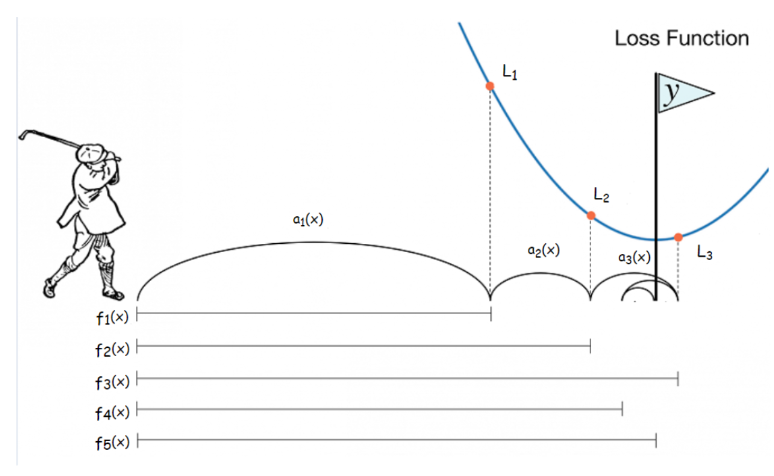

Бустинг, использующий в качестве базовой модели дерево решений, называется **градиентным бустингом над деревьями решений (Gradient Boosting on Decision Trees, GBDT)**. 

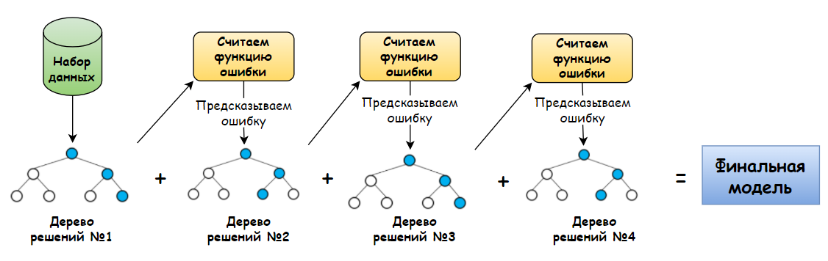

Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях.

Рекомендации по выбору внешних параметров алгоритма:
* Количество деревьев (**n_estimators**) - чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке;
- Темп обучения  (**learning_rate**) - чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1;
- Максимальная глубина деревьев (**max_depth**) - градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.

Может сложиться впечатление, что ансамблирование — всегда лучший вариант для финальной модели, однако часто в задачах требуется **интерпретируемость** результатов, которой не могу похвастаться бустинг и стекинг. 

### Градиентный бустинг (регрессия)

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor 3477.3


### Градиентный бустинг (классификация)

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [89]:
# Читаем исходные данные к задаче классификации
df = pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [90]:
# Создаем матрицу наблюдений 
X = df.drop(['quality'],axis = 1)
# Создаем вектор признаков для бинарной классификации
y = (df['quality'] >5).astype(int)

In [91]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# Посмотрим на размерности выборок
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


In [92]:
# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train, y_train)
# Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

c:\Users\lm137\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



In [93]:
# Прогнозируем вероятности принадлежности к классам
y_pred_proba = gb.predict_proba(X_test)
print(y_pred_proba)

[[0.7575177  0.2424823 ]
 [0.81931477 0.18068523]
 [0.80325657 0.19674343]
 ...
 [0.0212709  0.9787291 ]
 [0.90355559 0.09644441]
 [0.80946194 0.19053806]]
